In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import pickle
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.DataFrame({
'weather': ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy'],
'temp':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
'play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']})

In [3]:
df

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [8]:
# Encoding

le_weather = preprocessing.LabelEncoder()
le_weather.fit(df['weather'])
df['weather_encoded'] = le_weather.transform(df['weather'])

with  open('weather_coder.bin', 'wb') as f:
    pickle.dump(le_weather, f)

le_temp = preprocessing.LabelEncoder()
le_temp.fit(df['temp'])
df['temp_encoded'] = le_temp.transform(df['temp'])

with open('temp_coder.bin', 'wb') as g:
    pickle.dump(le_temp, g)

le_target = preprocessing.LabelEncoder()
le_target.fit(df['play'])
df['target'] = le_target.transform(df['play'])

with open('target_coder.bin', 'wb') as h:
    pickle.dump(le_target, h)

In [9]:
df

,weather,temp,play,weather_encoded,temp_encoded,target
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


In [10]:
X = df[['weather_encoded','temp_encoded']].values
y = df['target'].values

In [16]:
X.shape # X is a Nx2 Matrix

(14, 2)

In [18]:
y.shape # y is a vector with N items

(14,)

In [19]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [21]:
model.predict_proba(X) # The first column shows the probability of not going (0) and the second column shows the probability of going (1) to the golf game.

array([[0.70885451, 0.29114549],
       [0.70885451, 0.29114549],
       [0.00792188, 0.99207812],
       [0.32640519, 0.67359481],
       [0.24077188, 0.75922812],
       [0.24077188, 0.75922812],
       [0.00505764, 0.99494236],
       [0.70311538, 0.29688462],
       [0.60783345, 0.39216655],
       [0.32640519, 0.67359481],
       [0.70311538, 0.29688462],
       [0.00770751, 0.99229249],
       [0.00792188, 0.99207812],
       [0.32640519, 0.67359481]])

In [22]:
y_pred = model.predict(X)
print(y_pred)
print(y)

[0 0 1 1 1 1 1 0 0 1 0 1 1 1]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [23]:
model.score(X, y)

0.7142857142857143

In [24]:
cm = confusion_matrix(y, y_pred)
cm

array([[3, 2],
       [2, 7]], dtype=int64)

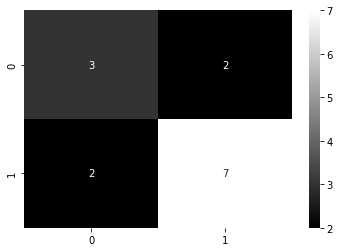

In [27]:
sns.heatmap(cm, annot=True,cmap='gray');

In [28]:
print('Accuracy: ', metrics.accuracy_score(y,y_pred))

Accuracy:  0.7142857142857143


In [29]:
with open('naivebayes1.bin', 'wb') as f:
    pickle.dump(model, f)

---
And Now We can Use this model in actual software

In [31]:
m = pickle.load(open('naivebayes1.bin', 'rb'))
wt = pickle.load(open('weather_coder.bin', 'rb'))
tt = pickle.load(open('temp_coder.bin', 'rb'))
target_transformer = pickle.load(open('target_coder.bin', 'rb'))

In [37]:
choices = ['Sunny', 'Overcast', 'Rainy']  # Case is evil!
temp_choices = ['Hot', 'Mild', 'Cool']  # Case is evil!

while True:
    w = input(f"How Weather is {choices}: ")
    if w not in choices:
        print("Bad Choice!")
        continue
    
    t = input(f"Temp {temp_choices}: ")
    if t not in temp_choices:
        print("Bad Choice!")
        continue
    break
print('\u2500'*50)
print(w,t)

How Weather is ['Sunny', 'Overcast', 'Rainy']:  Overcast
Temp ['Hot', 'Mild', 'Cool']:  Mild


──────────────────────────────────────────────────
Overcast Mild


In [38]:
w_e = wt.transform(np.array([w]))
t_e = tt.transform(np.array([t]))
data = np.hstack((w_e,t_e))
print(data.reshape(-1,2))

[[0 2]]


In [39]:
result = m.predict(data.reshape(-1,2))
result

array([1])

In [40]:
r = target_transformer.inverse_transform(result)[0]
print(f"Answer is: {r}")

Answer is: Yes
